<a href="https://colab.research.google.com/github/alisha12548/AI/blob/main/catrabbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



train_dir = '/content/drive/MyDrive/cnn/val-cat-rabbit'
val_dir   = '/content/drive/MyDrive/cnn/val-cat-rabbit'
test_dir  = '/content/drive/MyDrive/cnn/test-images'



IMG_SIZE = (300, 300)
BATCH_SIZE = 16
EPOCHS = 15



train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Mounted at /content/drive
Found 414 images belonging to 2 classes.
Found 414 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 35, 35, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 156800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    20,070,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,164,801 (76.92 MB)

 Trainable params: 20,164,353 (76.92 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:

model_save_path = '/content/drive/MyDrive/CatvsRabbit/cat_vs_rabbit_model_300x300.h5'

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True)
]


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6684 - loss: 1.6221

26/26 ━━━━━━━━━━━━━━━━━━━━ 164s 6s/step - accuracy: 0.6690 - loss: 1.6535 - val_accuracy: 0.5217 - val_loss: 0.6963
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6932 - loss: 2.8858

26/26 ━━━━━━━━━━━━━━━━━━━━ 190s 6s/step - accuracy: 0.6947 - loss: 2.8649 - val_accuracy: 0.6304 - val_loss: 0.6548
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 150s 6s/step - accuracy: 0.8026 - loss: 1.5776 - val_accuracy: 0.5000 - val_loss: 1.4411
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.8206 - loss: 1.2027 - val_accuracy: 0.5000 - val_loss: 4.1820
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.7950 - loss: 1.2684 - val_accuracy: 0.5000 - val_loss: 3.1636
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.8259 - loss: 1.4388 - val_accuracy: 0.5000 - val_loss: 2.9425
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8091 - loss: 1.5994 - val_accuracy: 0.5145 - val_loss: 2.2345


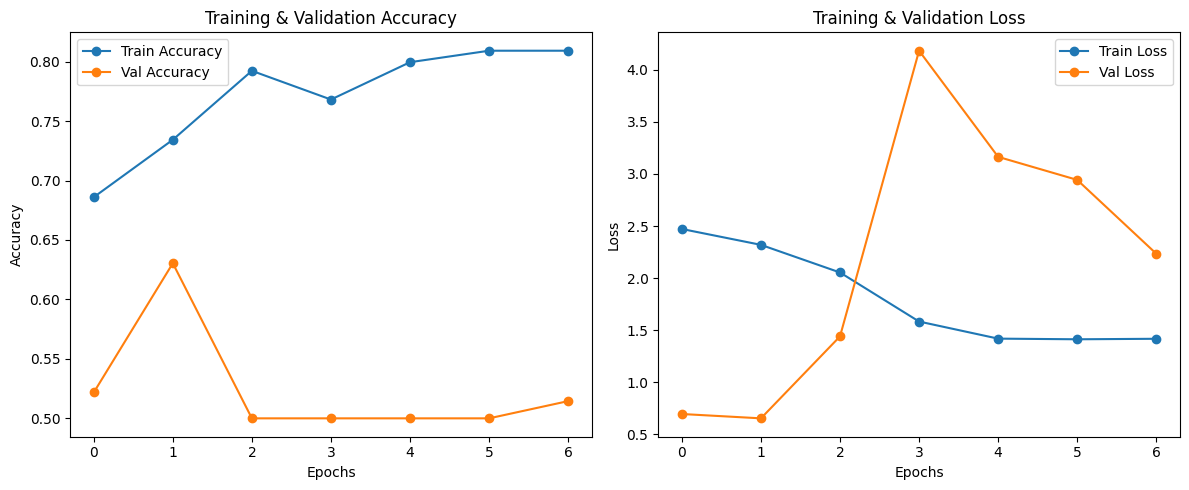

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step - accuracy: 0.6000 - loss: 0.5976



✅ Test Accuracy: 60.00%
✅ Test Loss: 0.5976

📁 Model saved to: /content/drive/MyDrive/CatvsRabbit/cat_vs_rabbit_model_300x300.h5


In [ ]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


model.save(model_save_path)
print(f"\n📁 Model saved to: {model_save_path}")


In [ ]:
import os

test_cat_dir = '/content/drive/MyDrive/cnn/test-images/cat'
test_rabbit_dir = '/content/drive/MyDrive/cnn/test-images/rabbit'

print("🐱 Cat test images:")
print(os.listdir(test_cat_dir)[:5])

print("\n🐇 Rabbit test images:")
print(os.listdir(test_rabbit_dir)[:5])


🐱 Cat test images:
['cat.235.jpg', 'cat.239.jpg', 'cat.208.jpg', 'cat.234.jpg', 'cat.236.jpg']

🐇 Rabbit test images:
['images.jpeg', 'rabbit_test.jpeg', 'images-2.jpeg', 'images-3.jpeg', 'images-4.jpeg']


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


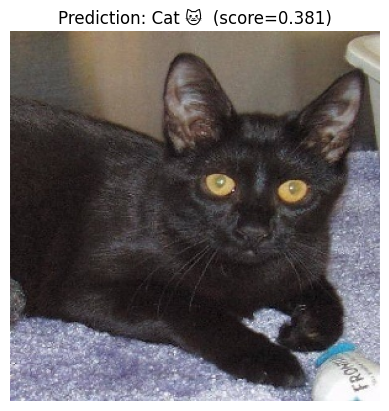

In [ ]:


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/CatvsRabbit/cat_vs_rabbit_model_300x300.h5'
model = load_model(model_path)
print("✅ Model loaded successfully!")


img_path = '/content/drive/MyDrive/cnn/test-images/cat/cat.208.jpg'


IMG_SIZE = (300, 300)

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0


prediction = model.predict(img_array)[0][0]

if prediction >= 0.5:
    label = 'Rabbit 🐇'
else:
    label = 'Cat 🐱'

plt.imshow(img)
plt.title(f"Prediction: {label}  (score={prediction:.3f})")
plt.axis('off')
plt.show()
